# Model Algorithms

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_ml = pd.read_csv('C:/Users/HARESH/Downloads/Final project/Fraud_data_final_new.csv')

In [3]:
fraud_ml.shape

(1484540, 17)

In [4]:
fraud_ml.head()

,Unnamed: 0,Area_Service,Age,Gender,Cultural_group,ethnicity,Admission_type,Home or self care,ccs_procedure_code,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,0,6,3,0,2,0,3,7,0,1.0,0,0,1,5511.95,1.012798,1,1
1,1,6,5,0,2,0,2,17,0,2.0,0,0,1,4783.20,1.079365,1,1
2,2,6,3,0,2,0,2,7,0,1.0,0,0,1,3829.15,1.059379,1,1
3,3,6,1,0,2,0,2,7,0,1.0,0,0,1,1108.20,1.484167,1,0
4,4,6,5,0,2,0,3,7,0,3.0,0,0,1,3418.18,0.986161,1,1


In [5]:
fraud_ml=fraud_ml.drop(['Unnamed: 0'],axis=1)
fraud_ml

,Area_Service,Age,Gender,Cultural_group,ethnicity,Admission_type,Home or self care,ccs_procedure_code,Mortality risk,Surg_Description,Weight_baby,Emergency dept_yes/No,Tot_charg,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,6,3,0,2,0,3,7,0,1.0,0,0,1,5511.95,1.012798,1,1
1,6,5,0,2,0,2,17,0,2.0,0,0,1,4783.20,1.079365,1,1
2,6,3,0,2,0,2,7,0,1.0,0,0,1,3829.15,1.059379,1,1
3,6,1,0,2,0,2,7,0,1.0,0,0,1,1108.20,1.484167,1,0
4,6,5,0,2,0,3,7,0,3.0,0,0,1,3418.18,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484535,1,1,1,2,0,1,8,2,1.0,1,0,1,30925.50,0.327142,2,0
1484536,6,3,1,2,0,3,7,224,3.0,0,0,0,15411.49,0.697805,2,0
1484537,6,5,1,2,0,1,18,0,3.0,0,0,1,9153.02,0.450387,2,0
1484538,2,5,0,2,0,1,18,193,3.0,0,0,1,18450.13,0.633075,2,0


In [6]:
x_res = fraud_ml.drop(['Result'], axis=1)
y_res = fraud_ml['Result']

## MACHINE LEARNING ALGORITHMS

# 1.RANDOM FOREST  CLASSIFIER

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.30,random_state=40)

# Building model

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2, random_state=40)
model.fit(x_res,y_res)

RandomForestClassifier(n_jobs=2, random_state=40)

# Validation of model

In [9]:
y_pred_train= model.predict(x_train)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_train))

Accuracy of training model 0.9984073950757233
Confusion Matrics [[519733    188]
 [  1467 517790]]
Classificaton Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00    519921
           1       1.00      1.00      1.00    519257

    accuracy                           1.00   1039178
   macro avg       1.00      1.00      1.00   1039178
weighted avg       1.00      1.00      1.00   1039178



In [12]:
y_pred_test= model.predict(x_test)

In [13]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_test))

Accuracy of testing model 0.9983766015061905
Confusion Matrics [[222266     83]
 [   640 222373]]
Classificaton Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00    222349
           1       1.00      1.00      1.00    223013

    accuracy                           1.00    445362
   macro avg       1.00      1.00      1.00    445362
weighted avg       1.00      1.00      1.00    445362



# 2.LOGISTIC REGRESSION

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.30,random_state=40)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [16]:
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred_train=lr.predict(x_train)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_train))

Accuracy of training model 0.5002858028172267
Confusion Matrics [[519780    141]
 [519151    106]]
Classificaton Report                precision    recall  f1-score   support

           0       0.50      1.00      0.67    519921
           1       0.43      0.00      0.00    519257

    accuracy                           0.50   1039178
   macro avg       0.46      0.50      0.33   1039178
weighted avg       0.46      0.50      0.33   1039178



In [20]:
y_pred_test1= lr.predict(x_test)

In [21]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_test1))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_test1))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_test1))

Accuracy of testing model 0.49920738635087863
Confusion Matrics [[222287     62]
 [222972     41]]
Classificaton Report               precision    recall  f1-score   support

           0       0.50      1.00      0.67    222349
           1       0.40      0.00      0.00    223013

    accuracy                           0.50    445362
   macro avg       0.45      0.50      0.33    445362
weighted avg       0.45      0.50      0.33    445362



# 3.DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10}
0.5034671627880567


In [24]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [25]:
y_pred_train_DT = dt_model.predict(x_train)
print("Accuracy score for the training data:" , accuracy_score(y_train, y_pred_train_DT))

Accuracy score for the training data: 0.5022411944825622


In [26]:
y_pred_test_DT = dt_model.predict(x_test)
print("Accuracy score for the testing data:" , accuracy_score(y_test, y_pred_test_DT))

Accuracy score for the testing data: 0.5020836982050557


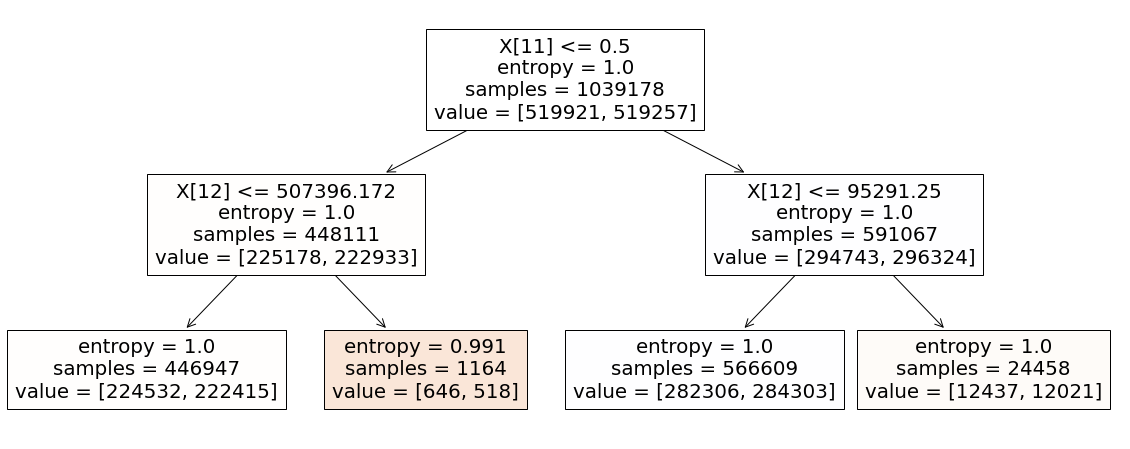

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize =(20,8))
plot_tree(decision_tree = dt_model, filled = True)
plt.show()

# 4.Adaboost 

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
adb_classifier=AdaBoostClassifier(base_estimator=None)
adb_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [29]:
y_pred_train=adb_classifier.predict(x_train)

In [30]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_train))
print("==============================================================================")
print("Classification Report ",classification_report(y_train,y_pred_train))

Accuracy of training model 0.5061375433275146
Confusion Matrics [[262468 257453]
 [255758 263499]]
Classification Report                precision    recall  f1-score   support

           0       0.51      0.50      0.51    519921
           1       0.51      0.51      0.51    519257

    accuracy                           0.51   1039178
   macro avg       0.51      0.51      0.51   1039178
weighted avg       0.51      0.51      0.51   1039178



In [31]:
y_pred_test1= adb_classifier.predict(x_test)

In [32]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_test1))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_test1))
print("==============================================================================")
print("Classification Report",classification_report(y_test,y_pred_test1))

Accuracy of testing model 0.5032939496409662
Confusion Matrics [[111673 110676]
 [110538 112475]]
Classification Report               precision    recall  f1-score   support

           0       0.50      0.50      0.50    222349
           1       0.50      0.50      0.50    223013

    accuracy                           0.50    445362
   macro avg       0.50      0.50      0.50    445362
weighted avg       0.50      0.50      0.50    445362

